# 2018 Fall Semester Machine Learning Term Paper

## 목차
### 0. 개요
### 1. 기본 환경 설정 및 데이터 불러오기
#### - 1.1 Import Packages
#### - 1.2 Load Dataset
### 2. 데이터 분석
#### - 2.1 Basic Charicteristic about Feature
#### - 2.2 Detailed Analysis about Feature
### 3. 데이터 전처리
#### - 3.1 Categorize
#### - 3.2 Encoding
#### - 3.3 Missing Value
#### - 3.4 Traning & Test Set
### 4. 모델링
#### - 4.1 K-Nearest Neighbors
#### - 4.2 Support Vector Machine
#### - 4.3 Random Forest
#### - 4.4 MultiLayer Perceptron
### 5. 평가
#### - 5.1 K-Nearest Neighbors
#### - 5.2 Support Vector Machine
#### - 5.3 Random Forest
#### - 5.4 MultiLayer Perceptron
### 6. 비교 및 분석
### 7. 마무리


## 0. 개요
이번 프로젝트에서는 와인의 질(Quality)를 예측해볼 것입니다.
## 1. 기본 환경 설정 및 데이터 불러오기
데이터는 Kaggle 의 https://www.kaggle.com/rajyellow46/wine-quality 를 이용했습니다.
### 1.1 Import Packages

In [1]:
import pandas as pd #1.2 Load Data
import matplotlib.pyplot as plt #2.1 Data Analysis
import seaborn as sns # 2.2 Data Analysis
from sklearn.preprocessing import LabelEncoder #3.2 Encoding
from sklearn.impute import SimpleImputer # 3.3 Missing value
from sklearn.model_selection import train_test_split #3.4 Train&Test
from sklearn.preprocessing import StandardScaler #3.4 Train&Test
from sklearn.neighbors import KNeighborsClassifier #4.1 KNN
from sklearn.svm import SVC #4.2 SVM
from sklearn.metrics import classification_report,accuracy_score #4.2 SVM
from sklearn.ensemble import RandomForestClassifier #4.3 Random Forest
import numpy as np #4.4MLP
from sklearn.model_selection import StratifiedKFold #4.4MLP
from keras.models import Sequential #4.4 MLP
from keras.layers import Dense #4.4 MLP 
from sklearn.model_selection import cross_val_score #5.1 KNN
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, r2_score #5.4MLP
%matplotlib inline

Using TensorFlow backend.


### 1.2 Load Dataset

In [2]:
wine_path = "C:/Users/gtqh2/Desktop/ml_term/winequalityN.csv"

In [3]:
wine = pd.read_csv(wine_path)

In [4]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
6,white,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
9,white,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6


## 2.데이터 분석
### 2.1  Basic Charicteristic about Feature
각 13개의 attirbutes들에 대하여 간략히 살펴봅니다.
 
#### type 
Red wine is made from dark red and black grapes. This is produced with whole grapes including the skin which adds to the color and flavor of red wines, giving it a rich flavor.
White wine is made from white grapes with no skins or seeds. Most white wines have a light and fruity flavor as compared to richer red wines.
#### fixed acidity
Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). 
#### volatile acidity
These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor.
#### citric acid
This is one of the fixed acids which gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness. 
#### residual sugar
This typically refers to the natural sugar from grapes which remains after the fermentation process stops, or is stopped
#### chlorides	
Chloride concentration in the wine is influenced by terroir and its highest levels are found in wines coming from countries where irrigation is carried out using salty water or in areas with brackish terrains. 
#### free sulfur dioxide	
This is the part of the sulphur dioxide that when added to a wine is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulphur to bind. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. 
#### total sulfur dioxide	
This is the sum total of the bound and the free sulfur dioxide ( SO2 ).  This is mainly added to kill harmful bacteria and preserve quality and freshness.
#### density
This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. 
####  pH
Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.
#### sulphates	
These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affects the wine aroma and flavor.
#### alcohol
Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. We interpret alcohol using many different taste receptors which is why it can taste bitter, sweet, spicy, and oily all at once. 
#### quality
Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.

### 2.2 Detailed Analysis about Feature
각 속성의 데이터에 대하여 살펴 봅니다. 그리고 어떤 문제점(missing value, data type 등)이 있는지 어떻게 전처리를 해야할지 고민해 봅니다.

#### 데이터 타입 및 Null값 확인

In [5]:
wine.count()

type                    6497
fixed acidity           6487
volatile acidity        6489
citric acid             6494
residual sugar          6495
chlorides               6495
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6488
sulphates               6493
alcohol                 6497
quality                 6497
dtype: int64

In [6]:
wine.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
wine.count()

type                    6497
fixed acidity           6487
volatile acidity        6489
citric acid             6494
residual sugar          6495
chlorides               6495
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6488
sulphates               6493
alcohol                 6497
quality                 6497
dtype: int64

각 요소별 개수를 확인하니, 총 6497개의 instances 에서 fixed acidity(-10),volatile acidity(-8), citric acid(-3), residual sugar(-2), chlorides(-2), pH(-9), sulphates(-4) 가 missing 되었음을 확인할 수 있습니다. 가장 중요한 Quality 요소가 4~6의 범위를 크게 벗어나지 않은 점을 고려할때, missing value를 평균값 등으로 대체하여도 문제가 없을 것 입니다. 

#### 속성 분석
이번 프로젝트에서는 와인의 질(Quality)를 예측해볼 것인데, 이때 속성들을 시각화하여 제거하거나 수정해야할 것이 있는지 확인합니다. 

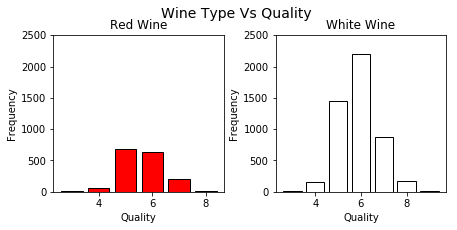

In [8]:
fig = plt.figure(figsize = (15, 3))
title = fig.suptitle("Wine Type Vs Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 2)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = wine.quality[wine.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', edgecolor='black')


ax2 = fig.add_subplot(1,4, 3)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = wine.quality[wine.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', edgecolor='black')

시각적으로 확인해본 결과 레드와인은 중간치(5~6)에 평가가 몰렸고, 화이트와인은 그에비해 좀더 고르게 평가가 있었습니다. 재미있는점은 와인의 질(Quality)을 평가할 때 극도로 맛있거나 맛있는 경우는 극히 드물다는 것입니다. 그러므로, 질에 대한 평가를 예측을 할 때에는 10개의 기준을 주기보다는 3단계로 나누는 것이 더 효율적일 것입니다.

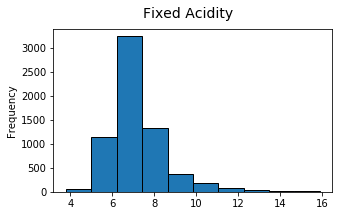

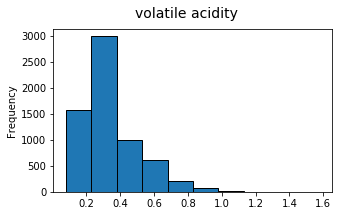

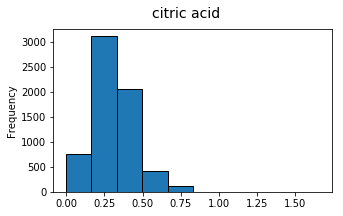

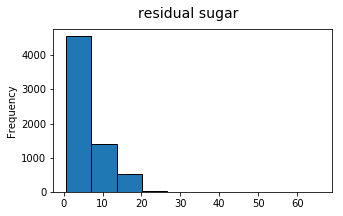

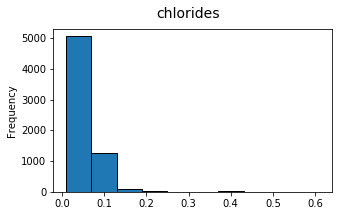

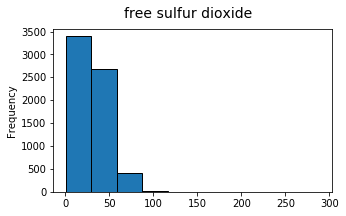

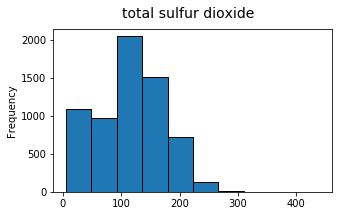

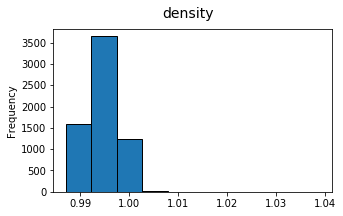

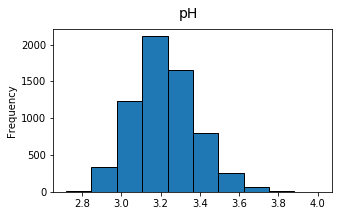

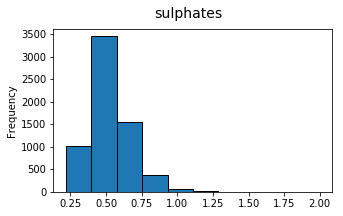

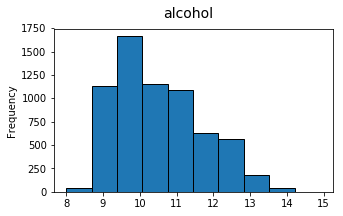

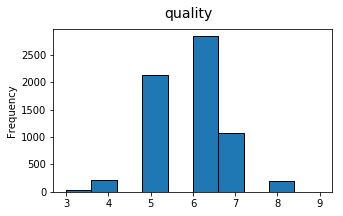

In [9]:
fig = plt.figure(figsize = (5, 3))
title = fig.suptitle("Fixed Acidity", fontsize=14)
wine['fixed acidity'].plot(kind='hist',  edgecolor='black')

fig = plt.figure(figsize = (5, 3))
title = fig.suptitle("volatile acidity ", fontsize=14)
wine['volatile acidity'].plot(kind='hist',  edgecolor='black')

fig = plt.figure(figsize = (5, 3))
title = fig.suptitle("citric acid ", fontsize=14)
wine['citric acid'].plot(kind='hist',  edgecolor='black')

fig = plt.figure(figsize = (5, 3))
title = fig.suptitle("residual sugar", fontsize=14)
wine['residual sugar'].plot(kind='hist',  edgecolor='black')

fig = plt.figure(figsize = (5, 3))
title = fig.suptitle("chlorides", fontsize=14)
wine['chlorides'].plot(kind='hist',  edgecolor='black')

fig = plt.figure(figsize = (5, 3))
title = fig.suptitle("free sulfur dioxide", fontsize=14)
wine['free sulfur dioxide'].plot(kind='hist',  edgecolor='black')

fig = plt.figure(figsize = (5, 3))
title = fig.suptitle("total sulfur dioxide", fontsize=14)
wine['total sulfur dioxide'].plot(kind='hist',  edgecolor='black')

fig = plt.figure(figsize = (5, 3))
title = fig.suptitle("density", fontsize=14)
wine['density'].plot(kind='hist',  edgecolor='black')

fig = plt.figure(figsize = (5, 3))
title = fig.suptitle("pH", fontsize=14)
wine['pH'].plot(kind='hist',  edgecolor='black')

fig = plt.figure(figsize = (5, 3))
title = fig.suptitle("sulphates", fontsize=14)
wine['sulphates'].plot(kind='hist',  edgecolor='black')

fig = plt.figure(figsize = (5, 3))
title = fig.suptitle("alcohol", fontsize=14)
wine['alcohol'].plot(kind='hist',  edgecolor='black')

fig = plt.figure(figsize = (5, 3))
title = fig.suptitle("quality", fontsize=14)
wine['quality'].plot(kind='hist',  edgecolor='black')

Histogram 으로 확인하였을 때, 와인의 Quality를 예상함에 있어서 과적합을 일으킬 feature는 없이 모두 유용한 지표가 된다고 판단됩니다. 
#### 속성들간의 상관관계 분석
어떤 속성이 와인의 질(Quality)에 큰 영향을 미치는지 시각적으로 확인해 봅니다.

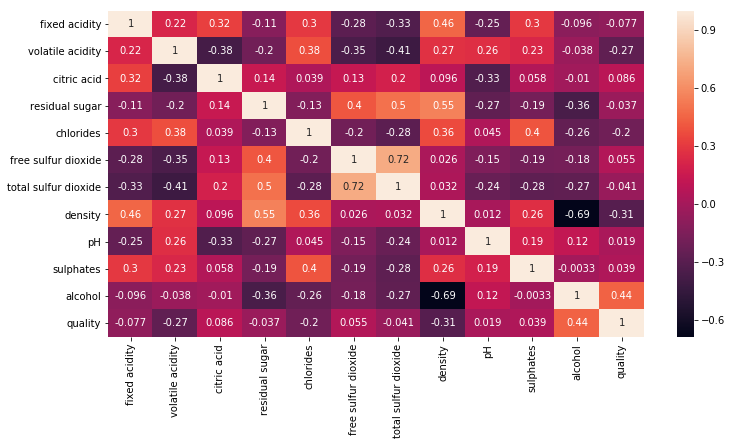

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(wine.corr(),annot=True)

이때 우리가 알 수 있는점은,  alchohol(0.44)와 density(-0.31) 이 상대적으로 높은 상관관계를 지녔다는 것 입니다.
## 3. 데이터 전처리
### 3.1 Categorize
앞서 2.2절(속성분석)에서 언급하였듯이 극도로 맛있거나 맛있는 경우는 극히 드물다는 것입니다. 그러므로, 질에 대한 평가를 예측을 할 때에는 10개의 기준을 주기보다는 3단계로 나누는 것이 더 효율적일 것입니다.

In [11]:
quality = wine["quality"].values
quality_ = []
for num in quality:
    if num<5:
        quality_.append("Bad")
    elif num>6:
        quality_.append("Good")
    else:
        quality_.append("Avg")

In [12]:
quality_ = pd.DataFrame(data=quality_, columns=["quality_"])
wine = pd.concat([wine,quality_],axis=1)
wine.drop(columns="quality",axis=1,inplace=True)

In [13]:
wine.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Avg
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Avg
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Avg


### 3.2 Encoding
#### LabelEncoder
이후 사용할 알고리즘들을 위해서 분류화된 quality_ 값을 숫자로 변화 시킵니다.

In [14]:
label_quality = LabelEncoder()
wine['quality_'] = label_quality.fit_transform(wine['quality_']) 
# avg(0),good(1),bad(2)

#from sklearn.preprocessing import LabelEncoder
#label_type = LabelEncoder()
#wine['type'] = label_quality.fit_transform(wine['type']) 
# Red(0), White(1)

#### OnehotEncoder
Type을 Red와 White로 구분 하였다. OneHotEncoder와 유사하다.

In [15]:
type_df = pd.get_dummies(wine[['type']])
wine = pd.concat((type_df,wine.drop(columns = ['type'])),axis = 1)

In [16]:
wine.head(15)

,type_red,type_white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_
0,0,1,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,0,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,0,1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,0,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,0,1,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
5,0,1,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
6,0,1,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0
7,0,1,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
8,0,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
9,0,1,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,0


Qulaity_ 의 경우 Avg(0), Good(1), Bad(2)로 변환되었고, Type의 경우 Red, White로 변환되었다.

### 3.3 Missing Value
#### Simple Imputer
acidity 의경우 가장 높은 빈도로 , 그 외의 값들은 평균 값으로 Null값을 대체하였습니다.


In [17]:
imputer = SimpleImputer(strategy='most_frequent') #가장 높은 빈도로 적용
wine[['fixed acidity']] = imputer.fit_transform(wine[['fixed acidity']]) #Embarked 의 missing balue 들 fit 해주기
wine[['volatile acidity']] = imputer.fit_transform(wine[['volatile acidity']])
wine[['citric acid']] = imputer.fit_transform(wine[['citric acid']])
wine[['residual sugar']] = imputer.fit_transform(wine[['residual sugar']])
imputer = SimpleImputer(strategy='mean')
wine[['chlorides']] = imputer.fit_transform(wine[['chlorides']])
wine[['pH']] = imputer.fit_transform(wine[['pH']])
wine[['sulphates']] = imputer.fit_transform(wine[['sulphates']])

### 3.4 Training & Test Set
#### tarin_test_split & Standard Scaler

In [18]:
Y = wine.quality_
X = wine.drop('quality_', axis=1) 

X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=0) #추가
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test) 



c:\users\gtqh2\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\gtqh2\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 4.모델링
### 4.1 K-Nearest Neighbors

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred_knn=knn.predict(X_test)

### 4.2 Support Vector Machine

In [20]:
svc = SVC()
svc.fit(X_train,Y_train)
pred_svc =svc.predict(X_test)

### 4.3 Random Forest

In [21]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)

### 4.4 MultiLayer Perceptron

#### relu

In [22]:
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(128, input_dim=13, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X[train], Y[train], epochs=10, verbose=1)

Epoch 1/10
5196/5196 [==============================] - 0s 77us/step - loss: 0.5325 - mean_absolute_error: 0.5646
Epoch 2/10
5196/5196 [==============================] - 0s 34us/step - loss: 0.5090 - mean_absolute_error: 0.5318
Epoch 3/10
5196/5196 [==============================] - 0s 37us/step - loss: 0.4995 - mean_absolute_error: 0.5234
Epoch 4/10
5196/5196 [==============================] - 0s 32us/step - loss: 0.4951 - mean_absolute_error: 0.5150
Epoch 5/10
5196/5196 [==============================] - 0s 36us/step - loss: 0.4883 - mean_absolute_error: 0.5114
Epoch 6/10
5196/5196 [==============================] - 0s 34us/step - loss: 0.4855 - mean_absolute_error: 0.5037
Epoch 7/10
5196/5196 [==============================] - 0s 34us/step - loss: 0.4811 - mean_absolute_error: 0.5045
Epoch 8/10
5196/5196 [==============================] - 0s 35us/step - loss: 0.4766 - mean_absolute_error: 0.4984
Epoch 9/10
5196/5196 [==============================] - 0s 35us/step - loss: 0.4740 - me

#### tanh 이용

In [23]:
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(128, input_dim=13, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X[train], Y[train], epochs=10, verbose=1)

Epoch 1/10
5196/5196 [==============================] - 1s 114us/step - loss: 0.5328 - mean_absolute_error: 0.5534
Epoch 2/10
5196/5196 [==============================] - 0s 41us/step - loss: 0.5270 - mean_absolute_error: 0.5301
Epoch 3/10
5196/5196 [==============================] - 0s 45us/step - loss: 0.5206 - mean_absolute_error: 0.5334
Epoch 4/10
5196/5196 [==============================] - 0s 53us/step - loss: 0.5176 - mean_absolute_error: 0.5332
Epoch 5/10
5196/5196 [==============================] - 0s 45us/step - loss: 0.5115 - mean_absolute_error: 0.5319
Epoch 6/10
5196/5196 [==============================] - 0s 42us/step - loss: 0.5091 - mean_absolute_error: 0.5268
Epoch 7/10
5196/5196 [==============================] - 0s 41us/step - loss: 0.5057 - mean_absolute_error: 0.5294
Epoch 8/10
5196/5196 [==============================] - 0s 41us/step - loss: 0.5014 - mean_absolute_error: 0.5217
Epoch 9/10
5196/5196 [==============================] - 0s 42us/step - loss: 0.4996 - m

## 5. 평가
### 5.1 K-Nearest Neighbor
KNN을 사용할 경우 Quality의 Avg(0) 과 Bad(2)에 대한 정확도는 양호 했으나, Good(1)을 판별하는 기능은 다소 아쉬웠다.

CV는 0.79의 평균값을 냈다. 

In [24]:
print(classification_report(Y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       995
           1       0.33      0.02      0.04        53
           2       0.65      0.54      0.59       252

   micro avg       0.82      0.82      0.82      1300
   macro avg       0.61      0.50      0.50      1300
weighted avg       0.79      0.82      0.79      1300



In [25]:
pred_knn = cross_val_score(estimator = knn, X = X_train, y = Y_train, cv = 10)
pred_knn.mean()

0.7941249205942771

### 5.2 Support Vector Machine
SVM는 전반적으로 낮은 성능을 보였다. 특히 Good(1)을 판별하지 못하는점을 고려할 때 실질적으로 사용할 수 없는 알고리즘이다.

CV값으로 0.79 의 평균값을 냈다.

In [26]:
print(classification_report(Y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       995
           1       0.00      0.00      0.00        53
           2       0.65      0.26      0.37       252

   micro avg       0.79      0.79      0.79      1300
   macro avg       0.48      0.41      0.41      1300
weighted avg       0.74      0.79      0.74      1300



c:\users\gtqh2\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
pred_svc = cross_val_score(estimator = svc, X = X_train, y = Y_train, cv = 10)
pred_svc.mean()

c:\users\gtqh2\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\gtqh2\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\gtqh2\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

0.7952872719525887

### 5.3 Random Forest
정밀도(recall)와 정확도(precision)에서 모두 높은 값을 보였으며, 이는 두 값이 조화된 F1-score에서도 확인할 수 있다.

CV는 0.84의 평균값을 확인할 수 있다.

In [28]:
print(classification_report(Y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       995
           1       0.80      0.08      0.14        53
           2       0.80      0.57      0.66       252

   micro avg       0.85      0.85      0.85      1300
   macro avg       0.82      0.54      0.57      1300
weighted avg       0.85      0.85      0.83      1300



In [29]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = Y_train, cv = 10)
rfc_eval.mean()

0.8480038339112707

### 5.4 MultiLayer Perceptron
relu가 아닌 tanh 를 썻을 떄 근소하게 우세한 성능을 보였으므로 tanh의 성능을 평가합니다.

MSE (Mean Squared Error) 및 MAE (Mean Absolute Error)를 사용할 수 있습니다. 

MSE는 "평균 제곱 편차"(MSD)라고도하며 오류 또는 편차의 제곱 평균을 측정합니다. 즉, 추정량과 추정값 간의 차이를 정량화합니다.

이렇게하면 평가자의 품질에 대해 더 많이 알게됩니다.항상 음수가 아니며 0에 가까운 값이 더 좋습니다.

R2는 결정계수라고 하며 회귀모형의 설명력을 표현하는 것입니다. 0에 가까울수록 설명력이 낮고, 1에 가까울수록 높습니다.
#### MSE

In [30]:
Y_pred = model.predict(X[test])
mse_value, mae_value = model.evaluate(X[test], Y[test], verbose=0)

print(mse_value)

0.5140199480673014


#### MAE

In [31]:
print(mae_value)

0.5264171737551873


#### R2 Score

In [32]:
r2_score(Y[test], Y_pred)

0.19445803160682107

MSE, MAE, R2 모두 좋은 지표를 보이지는 못했습니다.

## 6. 비교 및 분석
### Random Forest > KNN > SVM > MLP
최근 많이 사용하는 알고리즘인 만큼 Random Forest가 가장 우수한 성능을 보였습니다.

## 7. 마무리
Wine의 Quality를 예측하는 프로젝트를 진행하였는데 산성, 알코올 농도, 당 수치등으로 꽤나 구체적으로 예측할 수 있었습니다.

아쉬운점은 MLP를 사용했을떄 현저히 성능이 저하되는점인데 과적합 시키는것 이외의 문제 해결방법은 찾지 못하였습니다.

다음 프로젝트는 Wine의 Type을 예측하는 것도 재미있는 기회일 것 같습니다. 
